In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/'
data_dir = ''

In [2]:
L_dict = {}
for i in range(1, 5) :
    path = os.path.join(main_dir, data_dir, 'run'+str(i).zfill(4))

    conf, ch = chain.load_config(os.path.join(path, 'config.conf'))

    if ch.lumen_type == 'hydroosmotic' :
        L, nions, pos = tools.load_file(os.path.join(path, 'sim_all.dat'))
    elif ch.lumen_type == 'hydraulic' :
        L, pos = tools.load_file(os.path.join(path, 'sim_all.dat'), hydroosmotic = False)
    
    #ell = tools.load_brfile(os.path.join(path, 'sim_bridges.dat'))
    L_dict[i] = L
    print(i, end='\r')

show_chain = 0
if show_chain :
    print(ch)
    x = np.linspace(0, ch.total_length, 1001)
    tools.plot_profile(x, ch, centers=0, lw=1.5, show=True)
    

KeyboardInterrupt: 

In [78]:
#savename_ns = os.path.join(main_dir, '_data/osmotic_competition/osmotic_eq/no_screening/graphs.eps')
x_log=1
y_log=0
show_totalarea=True

if ch.lumen_type == 'hydroosmotic' :
    tools.plot_evolution(L, nions, ell, savename='', show_totalarea=False, savefig=0, x_logscale=x_log, y_logscale=y_log, figsize=(8, 8))
else :
    tools.plot_evolution_hydraulic(L, ell, savename='', show_totalarea=show_totalarea, savefig=0, x_logscale=x_log, y_logscale=y_log, figsize=(10, 7))




NameError: name 'ell' is not defined

In [69]:
distrib = {}

color_list = ['r', 'b', 'g', 'purple', 'orange']

#step = np.logspace(1, np.log(50000)/np.log(10), 31, dtype=int)
step = [1, 100, 1000, 10000, 40000]

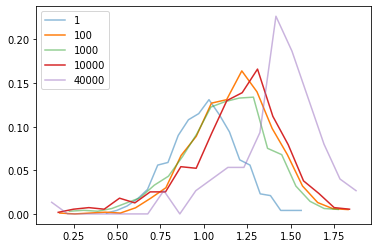

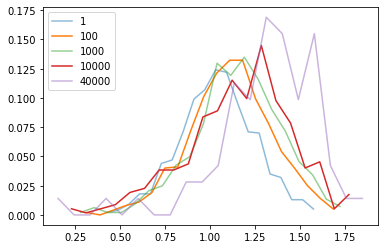

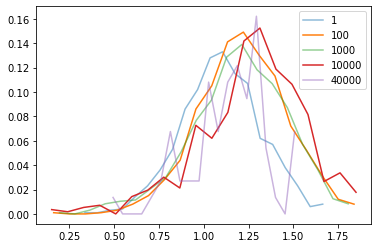

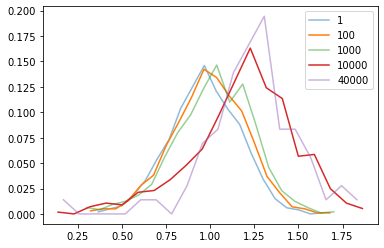

In [74]:
for k in L_dict.keys() :
    n=0
    for s in step :
        n+=1
        array = L_dict[k][s, 1:]
        cleaned_array = array[~np.isnan(array)]
        
        phi, x = np.histogram(cleaned_array, bins=20)
        xbar = np.average(x)
        
        plt.plot(0.5*(x[1:]+x[:-1])/xbar, phi/np.sum(phi), label = s, alpha = 0.5*n)
        distrib[s] = [0.5*(x[1:]+x[:-1])/xbar, phi/np.sum(phi)]
        if s % 1000 == 0 :
            print(t, end='\r')
    plt.legend()
    plt.show()

======= CHAIN =======
Type         : hydraulic
Total length : 116.66848651508272
Current Time : 0
======= PARAMETERS =======
tau : 1000000.0
======= LUMENS =======
Nb lumens : 10
Lumen 0 is at position 0.00000 with length 0.00000
Lumen 1 is at position 1.62563 with length 0.62563
Lumen 2 is at position 13.55785 with length 0.89815
Lumen 3 is at position 22.50927 with length 1.05090
Lumen 4 is at position 33.27531 with length 0.55734
Lumen 5 is at position 44.50573 with length 0.78181
Lumen 6 is at position 57.55914 with length 0.91356
Lumen 7 is at position 74.40870 with length 1.18351
Lumen 8 is at position 86.41518 with length 1.13650
Lumen 9 is at position 101.04443 with length 1.12251
Lumen 10 is at position 114.53635 with length 1.13214
Lumen -1 is at position 116.66849 with length 0.00000
======= BRIDGES ======
Bridge 0 : (0, 1) has length 1.0
Bridge 1 : (1, 2) has length 10.408
Bridge 2 : (2, 3) has length 7.0024
Bridge 3 : (3, 4) has length 9.1578
Bridge 4 : (4, 5) has length 9

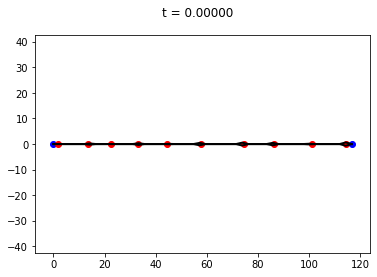

In [11]:
conf, ch = chain.load_config(os.path.join('/Users/mathieuleverge/git/chain_lumen/_data/hydraulic/N10/run0777', 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length)

tools.plot_profile(x, ch)

plot = 0
if plot :
    ell = tools.load_brfile(os.path.join(main_dir, 'sim_bridges.dat'))

    if ch.lumen_type == 'hydroosmotic' :
        L, nions, pos = tools.load_file(os.path.join(main_dir, 'sim_all.dat'), hydroosmotic=True)
        tools.plot_evolution()
    else :
        L, pos = tools.load_file(os.path.join(main_dir, 'sim_all.dat'), hydroosmotic=False)
        tools.plot_evolution_hydraulic(L, ell)


